In [1]:
import pandas as pd

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df = pd.read_csv("bitcoin_price_Training - Training.csv")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [11]:
df.describe()

,Open,High,Low,Close
count,1556.000000,1556.000000,1556.000000,1556.000000
mean,582.625328,597.992847,567.851446,584.239396
std,523.137312,542.992855,505.877401,525.904442
min,68.500000,74.560000,65.530000,68.430000
25%,254.287500,260.327500,248.835000,254.320000
50%,438.600000,447.560000,430.570000,438.855000
75%,662.437500,674.525000,646.735000,663.402500
max,2953.220000,2999.910000,2840.530000,2958.110000


In [15]:
df.duplicated().sum()

0

In [24]:
df['Date'] = df['Date'].astype("datetime64[ns]")

In [26]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


# Analysing change in price of the bitcoin overtime

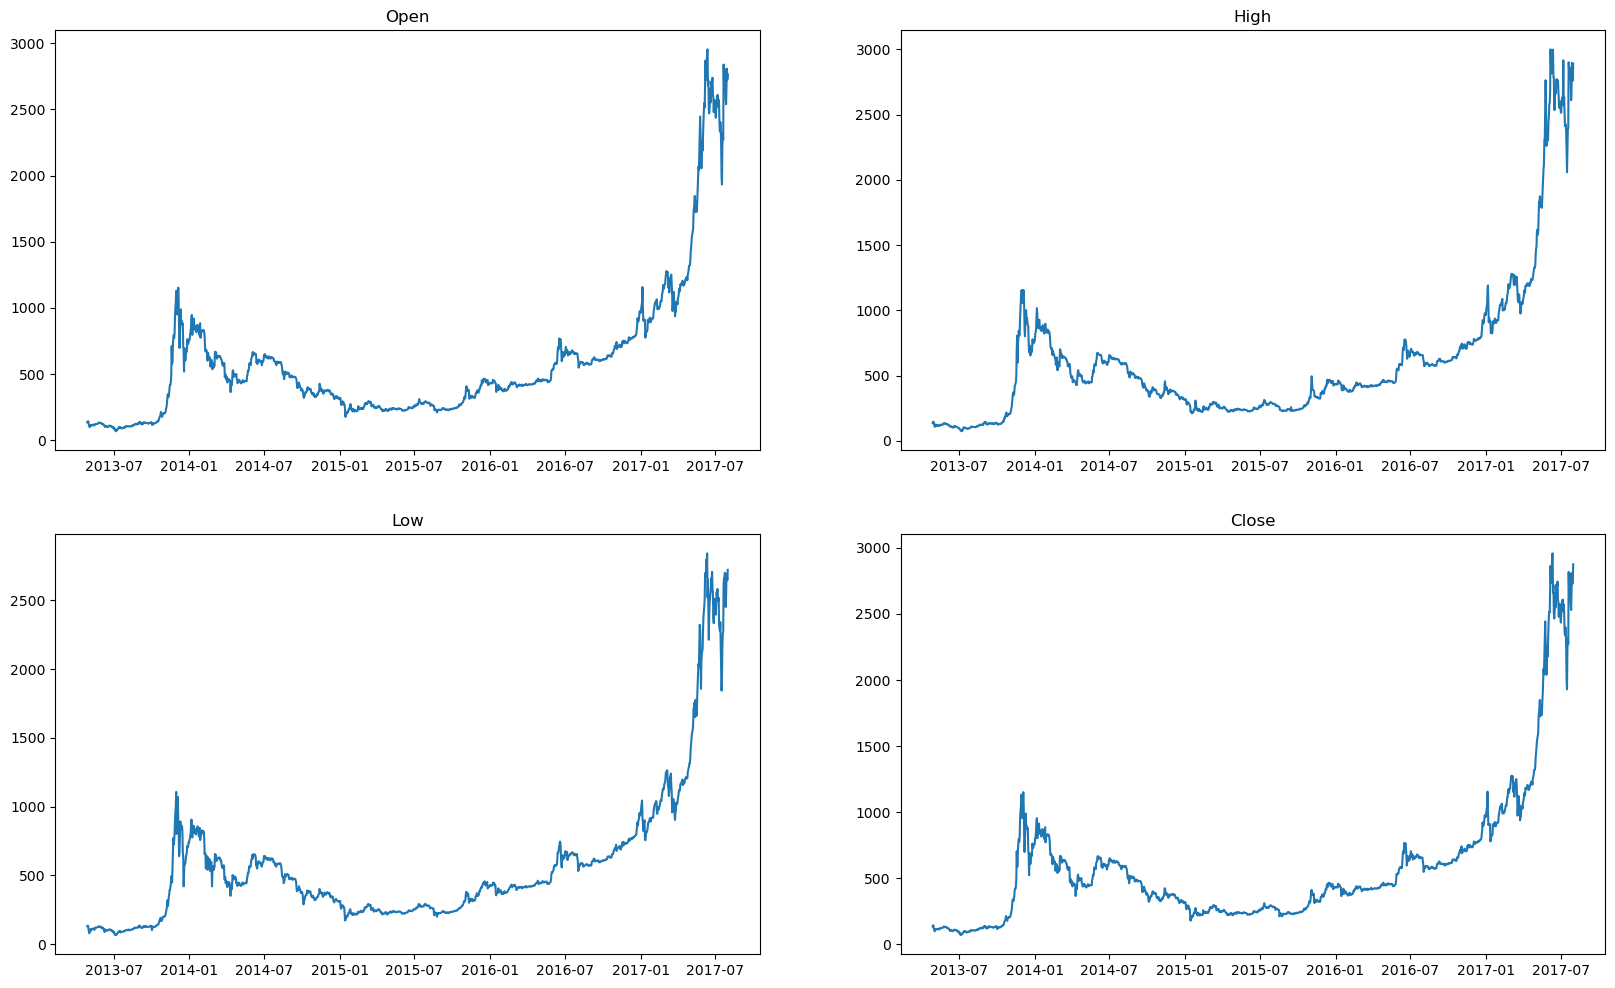

In [30]:
plt.figure(figsize=(20,12))
for index,col in enumerate(['Open', 'High', 'Low', 'Close'], 1):
    plt.subplot(2,2,index)
    plt.plot(df['Date'], df[col])
    plt.title(col)

# Analysing open , high , low , close value of Bitcoin using Candlestick Charts

In [32]:
bitcoin_sample = df[0:50]

In [34]:
import chart_studio.plotly as py

import plotly.graph_objs as go

import plotly.express as px

from plotly.offline import download_plotlyjs , init_notebook_mode , plot , iplot

In [36]:
init_notebook_mode(connected=True)

In [38]:
trace = go.Candlestick(x=bitcoin_sample['Date'] , 
              high =bitcoin_sample['High'] , 
              open = bitcoin_sample['Open'] , 
              close = bitcoin_sample['Close'] , 
              low = bitcoin_sample['Low'])

In [44]:
candle_data = [trace]

In [46]:
layout = {
    'title':'Bitcoin Historical Price' , 
    'xaxis':{'title':'Date'}
}

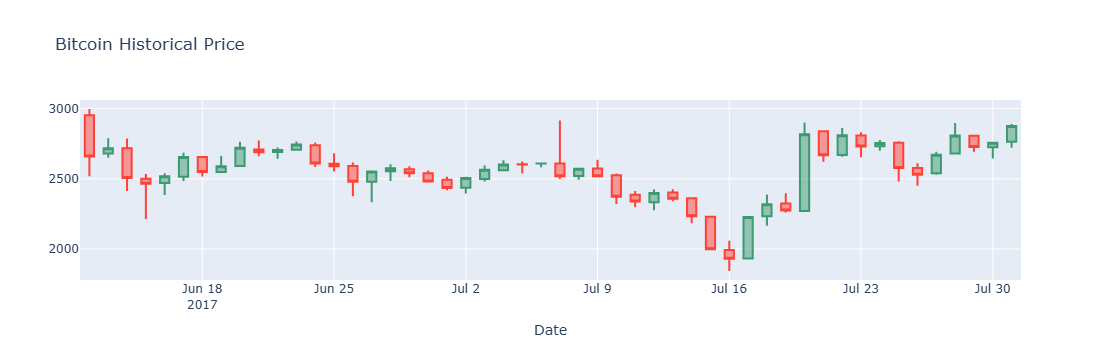

In [52]:
fig = go.Figure(data = candle_data , layout=layout)
fig.update_layout(xaxis_rangeslider_visible = False)
fig.show()

# Analysing closing price (on normal scale & log-scale)

In [59]:
df.set_index('Date', inplace=True)

Text(0.5, 1.0, 'Log Scaling')

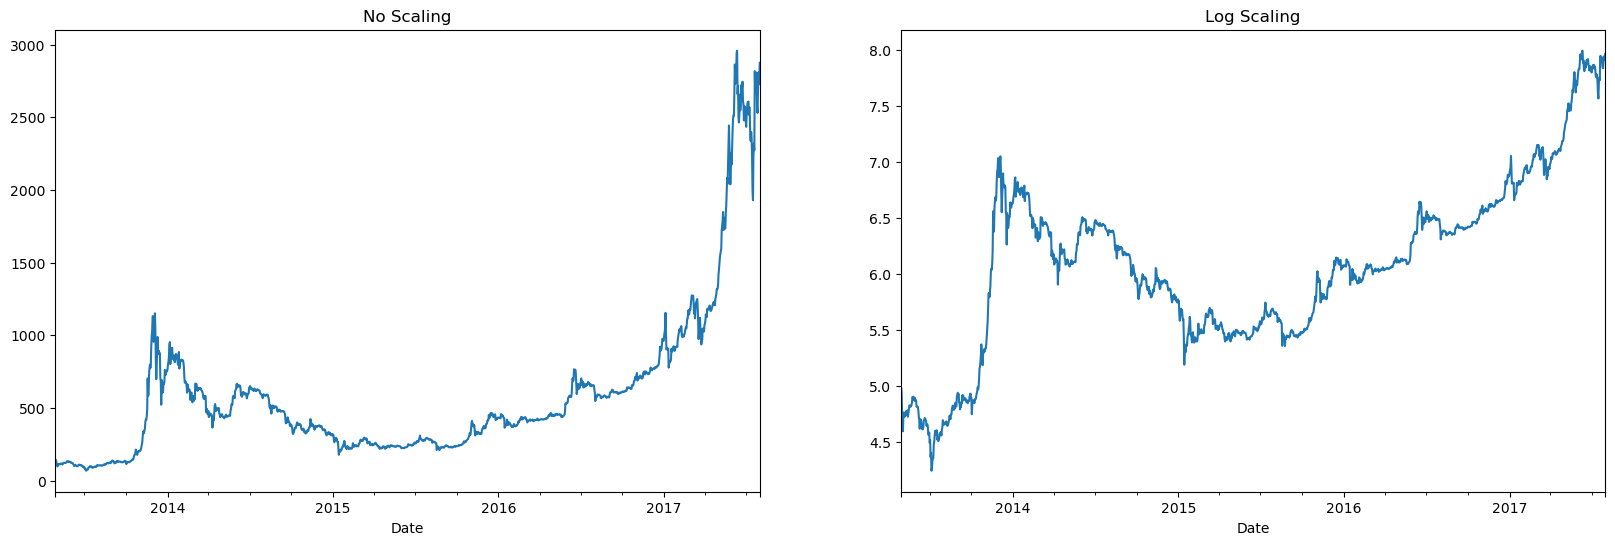

In [69]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
df['Close'].plot()
plt.title("No Scaling")

plt.subplot(1,2,2)
np.log1p(df['Close']).plot()
plt.title("Log Scaling")

In [ ]:
'''


Some features of the plot above:

    There is an up-ward trend from 2016 for each graph
    There is no seasonality
    There are no outliers


'''

# Analyse closing Price on Yearly , Quarterly , monthly basis !

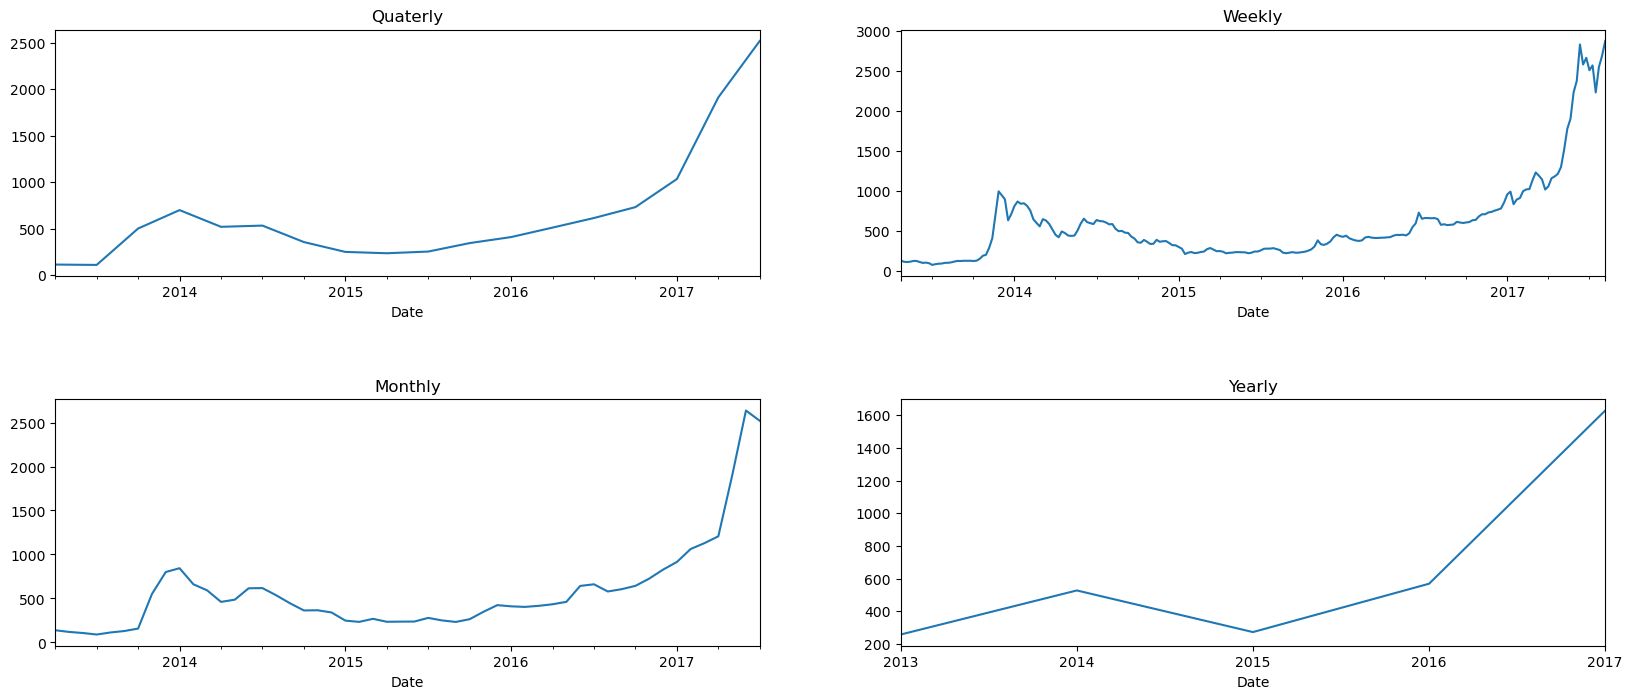

In [104]:
plt.figure(figsize=(20,8))

plt.subplot(2,2,1)
df['Close'].resample('QE').mean().plot()
plt.title("Quaterly")

plt.subplot(2,2,2)
df['Close'].resample('W').mean().plot()
plt.title("Weekly")

plt.subplot(2,2,3)
df['Close'].resample('ME').mean().plot()
plt.title("Monthly")

plt.subplot(2,2,4)
df['Close'].resample('YE').mean().plot()
plt.title("Yearly")

plt.subplots_adjust(hspace=0.5)

# Analysing daily change in Closing price of Bitcoin

In [113]:
df['Close_price_percentage'] = np.round(df['Close'].pct_change()*100,2)

<Axes: xlabel='Date'>

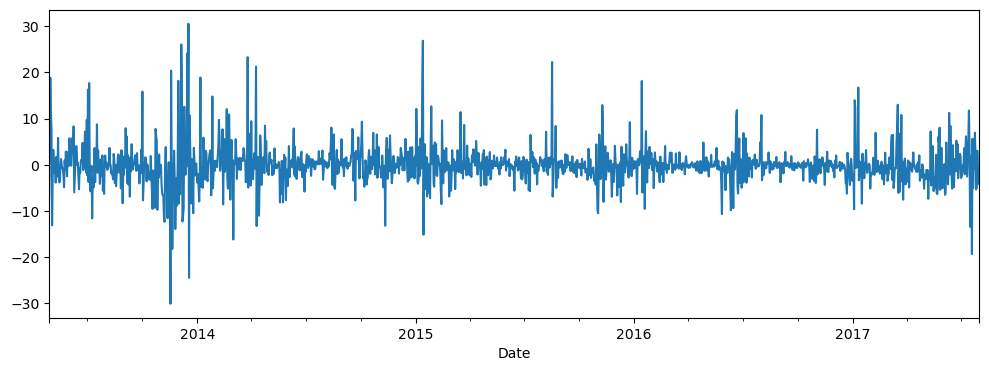

In [119]:
plt.figure(figsize=(12,4))
df['Close_price_percentage'].plot()